**Here we import Pandas, Numpy and Openpyxl Libraries to work with our project**

In [1]:
import pandas as pd
import numpy as np
import openpyxl

**Here we load our Dataset in the dataset variable and display it**

In [17]:
dataset=pd.read_excel(r"/content/Real_Fake_Dataset.xlsx")
dataset

,title,text,subject,True_or_Fake,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43736,Episode #9 – ON THE QT: ‘Cozy Bears & Eggnog’ ...,Here is the FULL Episode #9 of this podcast ...,US_News,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43737,SUNDAY SCREENING: ‘A Noble Lie’ (2011),21st Century Wire says Our weekly documentary ...,US_News,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43738,FLASHBACK: ‘The Syrian War: What You’re Not Be...,"21st Century Wire says Back in August 2013, Un...",US_News,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43739,Hannity Interview with Julian Assange: Wikilea...,21st Century Wire says Fox News Sean Hannity ...,US_News,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Our dataset is showing multiple colume which have NAN value and we have to remove them**

In [18]:
# Drop unnamed columns (columns with NaN values)
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
dataset.head()

,title,text,subject,True_or_Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


**From here we start working on the Text Preprocessing**

In [19]:
valid_subjects = ['politicsnews', 'politics', 'middle-east', 'left-news', 'news', 'worldnews', 'government news', 'us_news']
dataset = dataset[dataset['subject'].isin(valid_subjects)]
dataset["subject"].unique()

array(['worldnews', 'politics', 'left-news'], dtype=object)

In [20]:
dataset['True_or_Fake'].value_counts()
#dataset['True_or_Fake'].unique()

,count
True_or_Fake,
0,11295
1,10145


In [21]:
dataset.isnull().sum()

,0
title,0
text,558
subject,0
True_or_Fake,0


In [22]:
dataset.dropna(inplace=True)

In [23]:
dataset.isnull().sum()

,0
title,0
text,0
subject,0
True_or_Fake,0


In [24]:
dataset["text"]=dataset["text"].str.lower()
dataset["title"]=dataset["title"].str.lower()
dataset["subject"]=dataset["subject"].str.lower()


In [25]:
dataset

,title,text,subject,True_or_Fake
11272,reuters journalists in myanmar appear in court...,yangon (reuters) - two reuters journalists who...,worldnews,1
11273,kuwait says gcc to keep operating despite qata...,dubai (reuters) - kuwait s deputy foreign mini...,worldnews,1
11274,nigeria says u.s. agrees delayed $593 million ...,abuja (reuters) - the united states has formal...,worldnews,1
11275,syrian rebels say discussing evacuation from t...,beirut (reuters) - syrian rebels in a pocket o...,worldnews,1
11276,"trump to host norway's solberg on jan. 10, whi...",washington (reuters) - u.s. president donald t...,worldnews,1
...,...,...,...,...
43337,entitled irs ethics lawyer disbarred for ethic...,don t you just love an entitled irs lawyer who...,left-news,0
43338,[video] 16 yr old arrested for violent gang be...,this is a sad commentary on a generation who h...,left-news,0
43339,“non-violence hasn’t worked”…reverend sam most...,yeah that whole taking up arms thing seems t...,left-news,0
43340,watch dirty harry reid on his lie about romney...,"in case you missed it sen. harry reid (r-nv), ...",left-news,0


In [26]:
import re
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\s+')
  return pattern.sub(r'',text)

In [27]:
dataset['text']=dataset['text'].apply(remove_url)
dataset['title']=dataset['title'].apply(remove_url)

In [28]:
dataset

,title,text,subject,True_or_Fake
11272,reuters journalists in myanmar appear in court...,yangon (reuters) - two reuters journalists who...,worldnews,1
11273,kuwait says gcc to keep operating despite qata...,dubai (reuters) - kuwait s deputy foreign mini...,worldnews,1
11274,nigeria says u.s. agrees delayed $593 million ...,abuja (reuters) - the united states has formal...,worldnews,1
11275,syrian rebels say discussing evacuation from t...,beirut (reuters) - syrian rebels in a pocket o...,worldnews,1
11276,"trump to host norway's solberg on jan. 10, whi...",washington (reuters) - u.s. president donald t...,worldnews,1
...,...,...,...,...
43337,entitled irs ethics lawyer disbarred for ethic...,don t you just love an entitled irs lawyer who...,left-news,0
43338,[video] 16 yr old arrested for violent gang be...,this is a sad commentary on a generation who h...,left-news,0
43339,“non-violence hasn’t worked”…reverend sam most...,yeah that whole taking up arms thing seems t...,left-news,0
43340,watch dirty harry reid on his lie about romney...,"in case you missed it sen. harry reid (r-nv), ...",left-news,0


In [29]:
import string,time
string.punctuation
exclude=string.punctuation
def remove_punc1(text):
  return text.translate(str.maketrans('','',exclude))

In [30]:
dataset['text']=dataset['text'].apply(remove_punc1)
dataset['title']=dataset['title'].apply(remove_punc1)
dataset['title']=dataset['title'].apply(remove_punc1)

In [31]:
dataset

,title,text,subject,True_or_Fake
11272,reuters journalists in myanmar appear in court...,yangon reuters two reuters journalists who ha...,worldnews,1
11273,kuwait says gcc to keep operating despite qata...,dubai reuters kuwait s deputy foreign ministe...,worldnews,1
11274,nigeria says us agrees delayed 593 million fig...,abuja reuters the united states has formally ...,worldnews,1
11275,syrian rebels say discussing evacuation from t...,beirut reuters syrian rebels in a pocket of l...,worldnews,1
11276,trump to host norways solberg on jan 10 white ...,washington reuters us president donald trump ...,worldnews,1
...,...,...,...,...
43337,entitled irs ethics lawyer disbarred for ethic...,don t you just love an entitled irs lawyer who...,left-news,0
43338,video 16 yr old arrested for violent gang beat...,this is a sad commentary on a generation who h...,left-news,0
43339,“nonviolence hasn’t worked”…reverend sam moste...,yeah that whole taking up arms thing seems t...,left-news,0
43340,watch dirty harry reid on his lie about romney...,in case you missed it sen harry reid rnv who a...,left-news,0


In [32]:
chat_dict = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "lol": "laughing out loud",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "omg": "oh my god",
    "idk": "I don't know",
    "idc": "I don't care",
    "brb": "be right back",
    "gtg": "got to go",
    "ttyl": "talk to you later",
    "btw": "by the way",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "tbh": "to be honest",
    "thx": "thanks",
    "ty": "thank you",
    "np": "no problem",
    "fyi": "for your information",
    "afaik": "as far as I know",
    "smh": "shaking my head",
    "wtf": "what the fuck",
    "wth": "what the hell",
    "ikr": "I know right",
    "bff": "best friends forever",
    "gr8": "great",
    "b4": "before",
    "nvm": "never mind",
    "cya": "see you",
    "asap": "as soon as possible",
    "dm": "direct message",
    "afaik": "as far as I know",
    "tho": "though",
    "bc": "because",
    "rn": "right now",
    "jk": "just kidding",
    "hbu": "how about you",
    "wyd": "what are you doing",
    "wbu": "what about you",
    "hmu": "hit me up",
    "stfu": "shut the fuck up",
    "wtf": "what the fuck",
    "ttys": "talk to you soon",
    "omw": "on my way",
    "gg": "good game",
    "wp": "well played",
    "glhf": "good luck have fun",
    "ggwp": "good game well played",
    "ily": "I love you",
    "iykyk": "if you know you know",
    "ngl": "not gonna lie",
    "noob": "newbie",
    "oof": "expression of disappointment",
    "pov": "point of view",
    "rn": "right now",
    "sus": "suspicious",
    "tl;dr": "too long; didn't read",
    "yolo": "you only live once",
    "wya": "where are you",
    "wdym": "what do you mean",
    "bbl": "be back later",
    "bby": "baby",
    "bae": "before anyone else",
    "bruh": "bro",
    "lmk": "let me know",
    "nm": "not much",
    "nah": "no",
    "ikr": "I know, right?",
    "obv": "obviously",
    "pls": "please",
    "plz": "please",
    "ppl": "people",
    "qt": "cutie",
    "roflmao": "rolling on the floor laughing my ass off",
    "srsly": "seriously",
    "tbf": "to be fair",
    "w/e": "whatever",
    "wyd": "what are you doing",
    "xoxo": "hugs and kisses",
    "zzz": "sleeping",
}


In [33]:
def chat_word_treatment(text):
    words = text.split()
      # Tokenize words
    processed_words = [chat_dict.get(word, word) for word in words]  # Replace words
    return " ".join(processed_words)

In [34]:
dataset['text']=dataset['text'].apply(chat_word_treatment)
dataset['title']=dataset['title'].apply(chat_word_treatment)

In [35]:
dataset

,title,text,subject,True_or_Fake
11272,reuters journalists in myanmar appear in court...,yangon reuters two reuters journalists who hav...,worldnews,1
11273,kuwait says gcc to keep operating despite qata...,dubai reuters kuwait s deputy foreign minister...,worldnews,1
11274,nigeria says us agrees delayed 593 million fig...,abuja reuters the united states has formally a...,worldnews,1
11275,syrian rebels say discussing evacuation from t...,beirut reuters syrian rebels in a pocket of la...,worldnews,1
11276,trump to host norways solberg on jan 10 white ...,washington reuters us president donald trump w...,worldnews,1
...,...,...,...,...
43337,entitled irs ethics lawyer disbarred for ethic...,don t you just love an entitled irs lawyer who...,left-news,0
43338,video 16 yr old arrested for violent gang beat...,this is a sad commentary on a generation who h...,left-news,0
43339,“nonviolence hasn’t worked”…reverend sam moste...,yeah that whole taking up arms thing seems to ...,left-news,0
43340,watch dirty harry reid on his lie about romney...,in case you missed it sen harry reid rnv who a...,left-news,0


**The dataset contain the Fake and True news but problem is that first all the news are True and after all the news are false. Our model can learn this pattern and start giving incorrect output. That's why we mixed this dataset.**

In [36]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)


In [37]:
dataset

,title,text,subject,True_or_Fake
0,watch the white house christmas tree arrival c...,making christmas great again first lady melani...,politics,0
1,very funny video sarah palin advises trump to ...,just released hysterical video of sarah palin ...,politics,0
2,breaking news woman who narrated brutal tortur...,when four chicago thugs videotaped the brutal ...,politics,0
3,loretta lynch makes disturbing video encouragi...,obama s former ag loretta lynch released a vid...,politics,0
4,britain wants brexit accord but prepared for a...,london reuters britain wants to reach agreemen...,worldnews,1
...,...,...,...,...
20877,desperate to stop the flow of muslim refugees ...,the liberals find this plan to be disgusting u...,left-news,0
20878,fox legal expert susan rice committed 3 crimes...,fox news legal expert gregg jarrett dropped a ...,left-news,0
20879,iraqi forces capture north oil co from kurdish...,baghdadkirkuk iraq reuters iraqi on monday for...,worldnews,1
20880,boom wikileaks shows hillary speech to bankers...,no wonder she didn t want anyone to see her sp...,left-news,0


**Here we treat the stop word like: 'a','the','of','are','my', etc**

In [38]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
words=stopwords.words('english')
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
dataset['text']=dataset['text'].apply(remove_stopwords)
dataset['title']=dataset['title'].apply(remove_stopwords)

In [40]:
dataset['text'] = dataset['text'].apply(lambda x: " ".join(x))
dataset['title'] = dataset['title'].apply(lambda x: " ".join(x))

**#Here we perform Lemmatisation on our dataset and also tokenisation our dataset#**

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)  # Tokenizing text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatizing
    return " ".join(lemmatized_words)  # Joining words back into a sentence

# Apply the function to text and title columns
dataset['text'] = dataset['text'].apply(lemmatize_text)
dataset['title'] = dataset['title'].apply(lemmatize_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
dataset

,title,text,subject,True_or_Fake
0,w a t c h w h i t e h o u s e c h r i s t m a ...,m a k i n g c h r i s t m a s g r e a t f i r ...,politics,0
1,f u n n y v i d e o s a r a h p a l i n a d v ...,r e l e a s e d h y s t e r i c a l v i d e o ...,politics,0
2,b r e a k i n g n e w s w o m a n n a r r a t ...,f o u r c h i c a g o t h u g s v i d e o t a ...,politics,0
3,l o r e t t a l y n c h m a k e s d i s t u r ...,o b a m a f o r m e r a g l o r e t t a l y n ...,politics,0
4,b r i t a i n w a n t s b r e x i t a c c o r ...,l o n d o n r e u t e r s b r i t a i n w a n ...,worldnews,1
...,...,...,...,...
20877,d e s p e r a t e s t o p f l o w m u s l i m ...,l i b e r a l s f i n d p l a n d i s g u s t ...,left-news,0
20878,f o x l e g a l e x p e r t s u s a n r i c e ...,f o x n e w s l e g a l e x p e r t g r e g g ...,left-news,0
20879,i r a q i f o r c e s c a p t u r e n o r t h ...,b a g h d a d k i r k u k i r a q r e u t e r ...,worldnews,1
20880,b o o m w i k i l e a k s s h o w s h i l l a ...,w o n d e r w a n t a n y o n e s e e s p e e ...,left-news,0


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Combine 'title', 'text', and 'subject' as input
dataset['combined_text'] = dataset['title'] + " " + dataset['text'] + " " + dataset['subject']
X = dataset['combined_text'].tolist()  # Convert to list for BERT tokenizer
y = dataset['True_or_Fake'].tolist()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 5000  # Limit vocabulary size
max_len = 200  # Max length of a sequence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Padding sequences
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
embedding_dim = 128
max_words=5000
max_len=200
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim,input_length=max_len))
model.add(Bidirectional((GRU(100, return_sequences=True,kernel_regularizer=l2(0.001)))))
model.add(Dropout(0.4))
model.add(Bidirectional((GRU(50,kernel_regularizer=l2(0.001)))))
model.add(Dropout(0.4))
model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 200, 200)            │         138,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 100)                 │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           1,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,233 (3.26 MB)

 Trainable params: 855,233 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
batch_size = 32
epochs = 10
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)

history = model.fit(x_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_pad, y_test),callbacks=[early_stop])


Epoch 1/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.6916 - loss: 0.7835 - val_accuracy: 0.8805 - val_loss: 0.3084
Epoch 2/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.8876 - loss: 0.3193 - val_accuracy: 0.8767 - val_loss: 0.3010
Epoch 3/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8865 - loss: 0.3105 - val_accuracy: 0.8911 - val_loss: 0.3003
Epoch 4/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8920 - loss: 0.2984 - val_accuracy: 0.8791 - val_loss: 0.3383
Epoch 5/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8782 - loss: 0.3284 - val_accuracy: 0.8841 - val_loss: 0.2898
Epoch 6/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8954 - loss: 0.2859 - val_accuracy: 0.9035 - val_loss: 0.2497
Epoch 7/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.8946 - loss: 0.2756 - val_accuracy: 0.9952 - val_loss: 0.0522
Epoch 8/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9879 - loss: 0.0752 - 

In [54]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9997 - loss: 0.0248
Accuracy: 99.93%


In [52]:
def predict_fake_news(title, text, subject):
    combined_text = title + " " + text + " " + subject
    sequence = tokenizer.texts_to_sequences([combined_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    prediction = model.predict(padded_sequence)[0][0]
    confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100

    label = "Real" if prediction > 0.5 else "Fake"  # 1 -> Real, 0 -> Fake

    return label, confidence


In [53]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_pad)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred))


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2123
           1       1.00      1.00      1.00      2054

    accuracy                           1.00      4177
   macro avg       1.00      1.00      1.00      4177
weighted avg       1.00      1.00      1.00      4177



131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


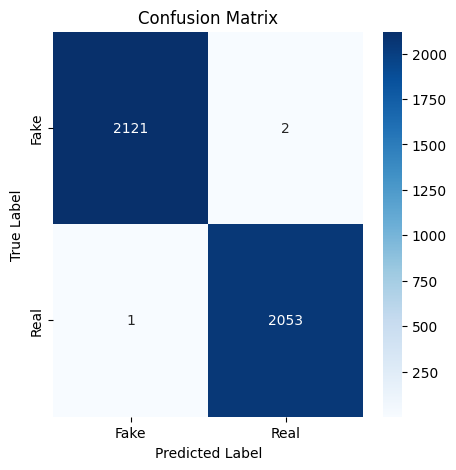

In [55]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Get predictions (probabilities)
y_pred = model.predict(x_test_pad)

# Convert probabilities to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)
 # If probability > 0.5, classify as 1 (Real), else 0 (Fake)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_binary)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [56]:
from tensorflow.keras.models import load_model
model.save('fake_news_detector_model.h5')


In [57]:
import pickle
with open("tokenizer_Fake_or_True.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [58]:
from google.colab import files

# Download model
files.download("fake_news_detector_model.h5")  # Change the filename if needed

# Download tokenizer
files.download("tokenizer_Fake_or_True.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>